In [241]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

# Pacote para tratamento de datas
from datetime import datetime
from datetime import timedelta

## Objetivo do Estudo:

Direcionar a equipe de marketing na sexta campanha da empresa. Para este estudo foram coletadas informações de usuários da base de forma aleatória, em um total de 2240 anotações.<p>
A campanha piloto custou ao departamento um total de 6.720MU e o retorno foi de 3.674MU, com uma taxa de sucesso de 15%. Esta porcentagem corresponde a 334 clientes que fizeram a aquisição do gadget.
Podemos inferir que cada gadget foi vendido por um valor médio de 11MU e, que para recuperar o valor investido é necessário a venda de mais 277 unidades.

O estudo a seguir analisa, de forma pragmática, cada feature da amostra e nos norteia como esta a aceitação do nosso market share. Ao final do estudo culminamos o resultado para a criação de um modelo preditivo de classificação.

## Metadata Table




![title](images/metadata_table.jpg)

In [242]:
arquivo_01 = ('ml_project1_data.csv')

df_inicial = pd.read_csv(arquivo_01, sep = ',')

In [243]:
df_inicial.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [244]:
df_inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
ID                     2240 non-null int64
Year_Birth             2240 non-null int64
Education              2240 non-null object
Marital_Status         2240 non-null object
Income                 2216 non-null float64
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Dt_Customer            2240 non-null object
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCmp3           2240 

</p>
O dataset possui valores missing na feature incoming, poderemos seguir a analise sem necessidade de tratamento destes dados. </p>


# EDA - Exploratory Data Analysys

A analise exploratória foi dividida em 3 grandes grupos:

- **01 - Perfil dos Entrevistados:**

Analise do perfil do entrevistado, levando em consideração informações pessoais e familiares. Aqui pode-se analisar escolaridade, idade, nucleo familiar, entre outras características.

- **02 - Perfil dos Produtos**

Avaliação do market share e representatividade de cada produto na plataforma, sendo analisados os Incomes de vinho, carne, peixe, doce, fruta e produtos gold.

- **03 - Meios de Venda**

Analise da representatividade dos meios de venda: catalogo, site ou loja.
Nesta seção podemos avaliar as reclamações e também a quantidade de compras feitas com desconto.


### Bonus: Analise das Campanhas

Como os dados estão sumarizado, não é possível distinguir o sucesso da campanha além da métrica de aderencia, ou seja, o número de usuários que aderiram a cada campanha. Aqui podemos medir de forma simples qual foi o publico atingido.

# 01 - Perfil dos Entrevistados

### 01.1 - Year of Birth

In [245]:
df_inicial['Year_Birth'].describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

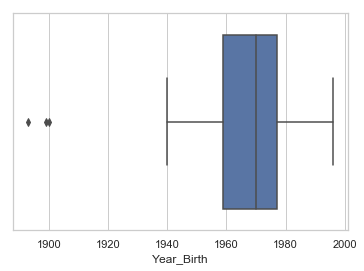

In [246]:
ax = sns.boxplot(x = df_inicial['Year_Birth'])

In [247]:
df_inicial.loc[df_inicial['Year_Birth'] < 1920]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,1,0,0,1,0,0,0,3,11,0


Detectado acima a existencia de 3 outliers, a informação será mantida no dataset por enquanto e será avaliado se estes dados serão tratados na criação do modelo.

In [248]:
df_inicial['Age'] =  2022 - df_inicial['Year_Birth'] 

In [249]:
df_inicial.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,65
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,68
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,57
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,38
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,41


C:\Users\Alexandre\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


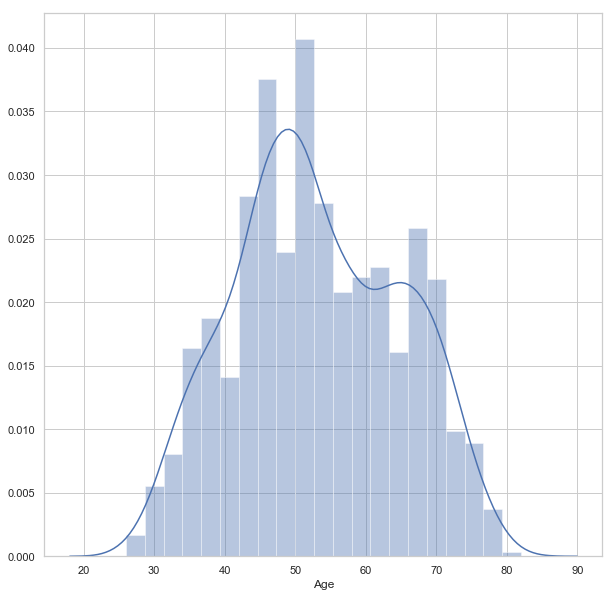

In [250]:
age_clean = df_inicial[df_inicial['Age'] < 100]

# Seaborn setting                                                                                                                                              
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("notebook")                                                  
plt.figure(figsize=(10, 10)) # Two column paper. Each column is about 3.15 inch wide.                                                                        
color = sns.color_palette("Set2", 6)


ax = sns.distplot(age_clean['Age'])

### Criação da feature: Age_cluster

- Cluster 1: grupo de 0 a 40;
- Cluster 2: grupo de 40 a 50;
- Cluster 3: grupo de 50 a 60;
- Cluster 4: grupo de 60 a 70;
- Cluster 5: grupo de 70 +

In [251]:
# create a new column and use np.select to assign values to it using our lists as arguments
df_inicial['Age_cluster'] = np.select(
    (df_inicial['Age'] <= 40,
    (df_inicial['Age'] > 40) & (df_inicial['Age'] <= 50),
    (df_inicial['Age'] > 50) & (df_inicial['Age'] <= 60),
    (df_inicial['Age'] > 60) & (df_inicial['Age'] <= 70),
    (df_inicial['Age'] > 70)),
    ('0-40', '40-50', '50-60', '60-70', '70-+')
    )

# display updated DataFrame
df_inicial.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,65,60-70
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,68,60-70
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,57,50-60
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,38,0-40
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,41,40-50


In [252]:
df_inicial.groupby('Age_cluster').agg({'ID' : 'count'}).sort_values(by = 'ID')

,ID
Age_cluster,
70-+,182
0-40,346
60-70,473
50-60,585
40-50,654


As idades do grupo estudado estão massivamente entre 40 e 60 anos, conforme tabela acima.

### 01.2 - Education

In [253]:
df_inicial['Education'].describe()

count           2240
unique             5
top       Graduation
freq            1127
Name: Education, dtype: object

In [254]:
education = df_inicial.groupby('Education').agg({'Education' : 'count'}).rename(
                        columns = {'Education' : 'Count'}).sort_values('Count',ascending=False)

education['Rate'] = education['Count'] / education['Count'].sum()
education['Cumulative'] = education['Rate'].cumsum()
education.round(decimals = 2)

,Count,Rate,Cumulative
Education,,,
Graduation,1127,0.50,0.50
PhD,486,0.22,0.72
Master,370,0.17,0.89
2n Cycle,203,0.09,0.98
Basic,54,0.02,1.00


### 01.3 - Marital_Status

In [255]:
mstats = df_inicial.groupby('Marital_Status').agg({'Marital_Status' : 'count'}).rename(
                        columns = {'Marital_Status' : 'Count'}).sort_values('Count',ascending=False)

mstats['Rate'] = mstats['Count'] / mstats['Count'].sum()
mstats['Cumulative'] = mstats['Rate'].cumsum() 
mstats.round(decimals = 2)

,Count,Rate,Cumulative
Marital_Status,,,
Married,864,0.39,0.39
Together,580,0.26,0.64
Single,480,0.21,0.86
Divorced,232,0.10,0.96
Widow,77,0.03,1.00
Alone,3,0.00,1.00
Absurd,2,0.00,1.00
YOLO,2,0.00,1.00


### Criação da feature: Status_cluster

- Cluster 1: married, together;
- Cluster 2: single, divorced, widow, alone;
- Cluster 3: others;

In [256]:
marital_map = {'Married' : 0,
               'Together' : 0,
               'Single' : 1,
               'Divorced' : 1,
               'Widow' : 1,
               'Alone' : 1,
               'Absurd' : 1,
               'YOLO' : 1}

df_inicial = df_inicial.replace(marital_map)

### 01.4 - Income

In [257]:
df_inicial['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [258]:
df_inicial['Income'].fillna(value = (df_inicial['Income'].mean()), inplace=True)

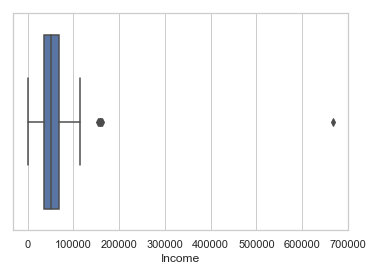

In [259]:
ax = sns.boxplot(x = df_inicial['Income'])

In [260]:
df_inicial.loc[df_inicial['Income'] > 100000].sort_values('Income', ascending = False)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_cluster
2233,9432,1977,Graduation,0,666666.0,1,0,2013-06-02,23,9,...,0,0,0,0,0,3,11,0,45,40-50
617,1503,1976,PhD,0,162397.0,1,1,2013-06-03,31,85,...,0,0,0,0,0,3,11,0,46,40-50
687,1501,1982,PhD,0,160803.0,0,0,2012-08-04,21,55,...,0,0,0,0,0,3,11,0,40,0-40
1300,5336,1971,Master,0,157733.0,1,0,2013-06-04,37,39,...,0,0,0,0,0,3,11,0,51,50-60
164,8475,1973,PhD,0,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,0,3,11,0,49,40-50
1653,4931,1977,Graduation,0,157146.0,0,0,2013-04-29,13,1,...,0,0,0,0,0,3,11,0,45,40-50
2132,11181,1949,PhD,0,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,0,3,11,0,73,70-+
655,5555,1975,Graduation,1,153924.0,0,0,2014-02-07,81,1,...,0,0,0,0,0,3,11,0,47,40-50
1898,4619,1945,PhD,1,113734.0,0,0,2014-05-28,9,6,...,0,0,0,0,0,3,11,0,77,70-+
646,4611,1970,Graduation,0,105471.0,0,0,2013-01-21,36,1009,...,0,1,1,0,0,3,11,1,52,50-60


Na feature Income, temos um outlier a ser tratado. Este valor sera reposto pela médida total.

In [261]:
df_inicial['Income'] = np.where(df_inicial['Income'] > 200000, df_inicial['Income'].mean() ,df_inicial['Income'])

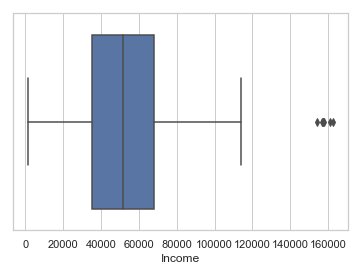

In [262]:
ax = sns.boxplot(x = df_inicial['Income'])

C:\Users\Alexandre\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


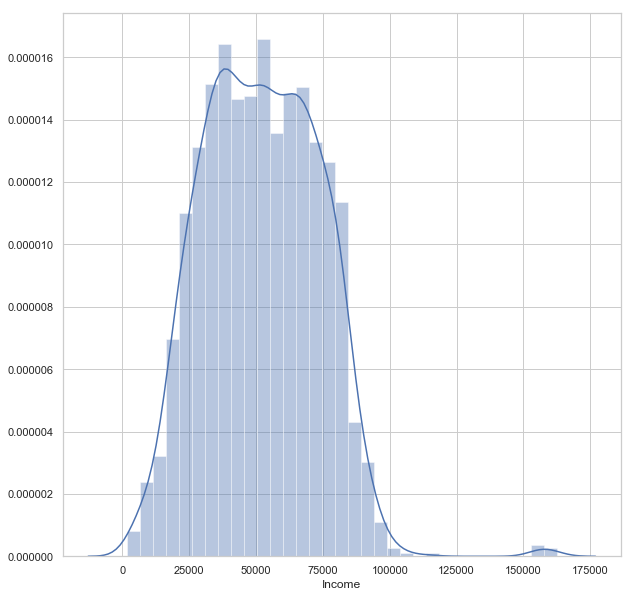

In [263]:
# Seaborn setting                                                                                                                                              
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("notebook")                                                  
plt.figure(figsize=(10, 10)) # Two column paper. Each column is about 3.15 inch wide.                                                                                                                                                                                         
color = sns.color_palette("Set2", 6)


ax = sns.distplot(df_inicial['Income']);

In [264]:
df_inicial['Income'].describe()

count      2240.000000
mean      51972.957270
std       21405.824379
min        1730.000000
25%       35538.750000
50%       51741.500000
75%       68275.750000
max      162397.000000
Name: Income, dtype: float64

#### Qual é o padrão de gastos destes consumidores?

Existe uma distribuição em formato de sino, mostrando uma distribuição normal com a media de 52.000 nos dados referentes ao ganho anual.
Neste caso iremos pesquisar pela distribuição de gastos nos últimos dois anos.

In [265]:
df_income = df_inicial.iloc[:,9:15]
df_income['Income'] = df_inicial['Income'] 


df_income['Total_spent'] = (df_income.iloc[:,0:6].sum(axis = 1))/ 2
df_income['rate'] = (df_income['Total_spent'] / df_income['Income']) * 100

df_income.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Income,Total_spent,rate
0,635,88,546,172,88,88,58138.0,808.5,1.390657
1,11,1,6,2,1,6,46344.0,13.5,0.029130
2,426,49,127,111,21,42,71613.0,388.0,0.541801
3,11,4,20,10,3,5,26646.0,26.5,0.099452
4,173,43,118,46,27,15,58293.0,211.0,0.361965


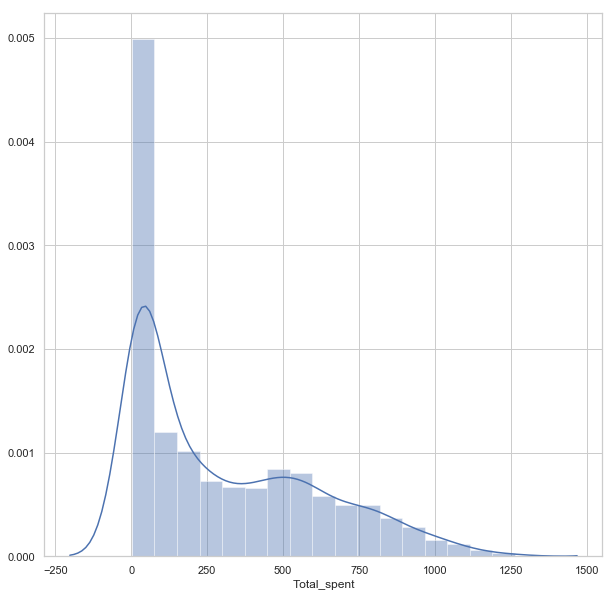

In [266]:
# Seaborn setting                                                                                                                                              
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("notebook")                                                  
plt.figure(figsize=(10, 10)) # Two column paper. Each column is about 3.15 inch wide.                                                                                                                                                                                         
color = sns.color_palette("Set2", 6)

ax = sns.distplot(df_income['Total_spent'])

O grafico de densidade acima nos mostra que o marketing de massa se concentra nas compras entre 0 e 250 reais. <p>
Estudaremos o nicho de usuários que gastaram nos últimos dois anos entre 300 e 600.

In [267]:
df_income[df_income['rate'] > 5]

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Income,Total_spent,rate
21,1,1,1725,1,1,1,2447.0,865.0,35.349407


### 01.5 - Kidhome

In [268]:
df_inicial['Kidhome'].describe()

count    2240.000000
mean        0.444196
std         0.538398
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Kidhome, dtype: float64

In [269]:
kids = df_inicial.groupby('Kidhome').agg({'Kidhome' : 'count'}).rename(
                        columns = {'Kidhome' : 'Count'}).sort_values('Count',ascending=False).reset_index()

kids['Rate'] = kids['Count'] / kids['Count'].sum()
kids.round(decimals = 2)

,Kidhome,Count,Rate
0,0,1293,0.58
1,1,899,0.40
2,2,48,0.02


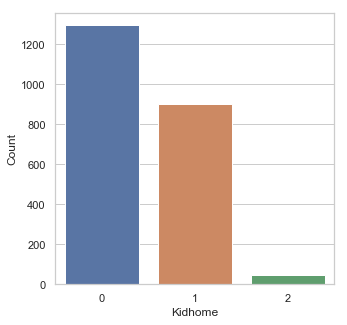

In [270]:
# Seaborn setting                                                                                                                                              
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("notebook")                                                  
plt.figure(figsize=(5, 5)) # Two column paper. Each column is about 3.15 inch wide.                                                                                                                                                                                         
color = sns.color_palette("Set2", 6)


ax = sns.barplot(kids['Kidhome'], kids['Count'])

### 01.6 - Teenhome

In [271]:
df_inicial['Teenhome'].describe()

count    2240.000000
mean        0.506250
std         0.544538
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Teenhome, dtype: float64

In [272]:
teen = df_inicial.groupby('Teenhome').agg({'Teenhome' : 'count'}).rename(
                        columns = {'Teenhome' : 'Count'}).sort_values('Count',ascending=False).reset_index()

teen['Rate'] = teen['Count'] / teen['Count'].sum()
teen.round(decimals = 2)

,Teenhome,Count,Rate
0,0,1158,0.52
1,1,1030,0.46
2,2,52,0.02


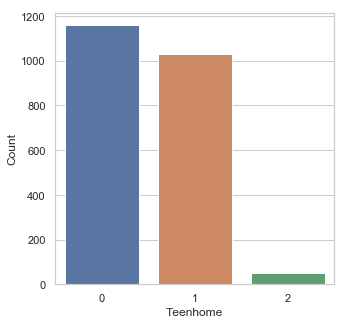

In [273]:
# Seaborn setting                                                                                                                                              
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("notebook")                                                  
plt.figure(figsize=(5, 5)) # Two column paper. Each column is about 3.15 inch wide.                                                                                                                                                                                         
color = sns.color_palette("Set2", 6)


ax = sns.barplot(teen['Teenhome'], teen['Count'])

### 01.7 - Dt_Customer
data que o cliente entrou para a plataforma.

In [274]:
df_inicial['Dt_Customer'].describe()

count           2240
unique           663
top       2012-08-31
freq              12
Name: Dt_Customer, dtype: object

In [275]:
df_inicial['Dt_Customer'] = pd.to_datetime(df_inicial['Dt_Customer'], format = '%Y-%m-%d')

In [276]:
df_inicial['Dt_Customer'].min()

Timestamp('2012-07-30 00:00:00')

In [277]:
df_inicial['Dt_Customer'].max()

Timestamp('2014-06-29 00:00:00')

In [278]:
today = datetime.now()
year = timedelta(days=365)

df_inicial['Years_on_plataform'] = ((today - df_inicial['Dt_Customer']) / year).round(2)

In [279]:
df_inicial.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_cluster,Years_on_plataform
0,5524,1957,Graduation,1,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,65,60-70,9.43
1,2174,1954,Graduation,1,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,68,60-70,7.92
2,4141,1965,Graduation,0,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,57,50-60,8.46
3,6182,1984,Graduation,0,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,38,0-40,7.99
4,5324,1981,PhD,0,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,41,40-50,8.05


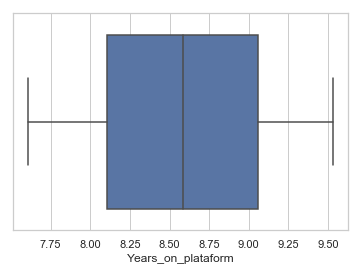

In [280]:
ax = sns.boxplot(x = df_inicial['Years_on_plataform'])

C:\Users\Alexandre\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


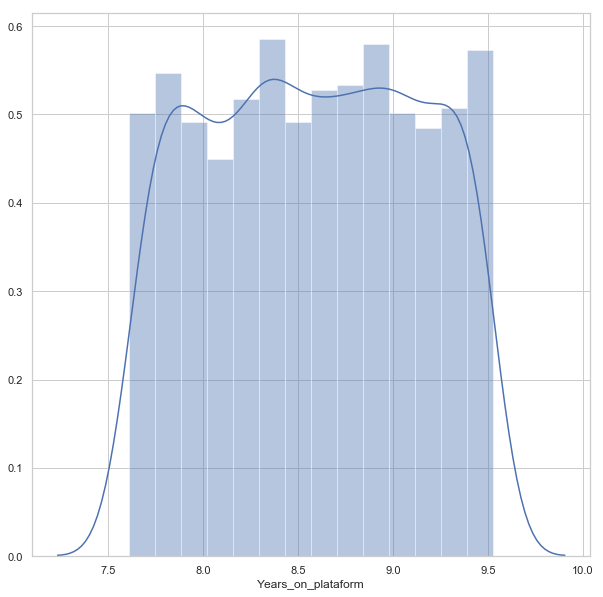

In [281]:
income_clean =  df_inicial[df_inicial['Income'] < 200000]

# Seaborn setting                                                                                                                                              
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("notebook")                                                  
plt.figure(figsize=(10, 10)) # Two column paper. Each column is about 3.15 inch wide.                                                                                                                                                                                         
color = sns.color_palette("Set2", 6)


ax = sns.distplot(df_inicial['Years_on_plataform'])

C:\Users\Alexandre\Anaconda3\lib\site-packages\scipy\stats\stats.py:2831: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.mean(atmp[sl], axis=axis)


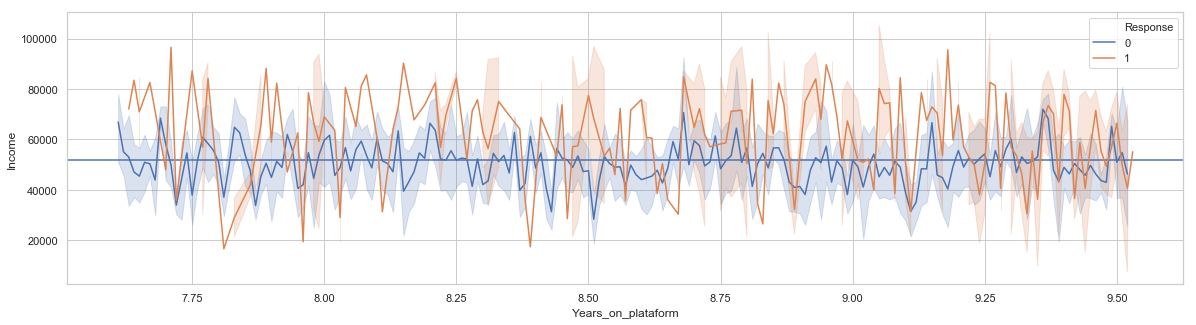

In [282]:
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("notebook")                                                  
plt.figure(figsize=(20, 5)) # Two column paper. Each column is about 3.15 inch wide.     
plt.axhline(stats.trim_mean(df_inicial['Income'], 0.1))


sns.lineplot(data=df_inicial[df_inicial['Income'] < 200000], 
    x="Years_on_plataform", y="Income", hue = 'Response');

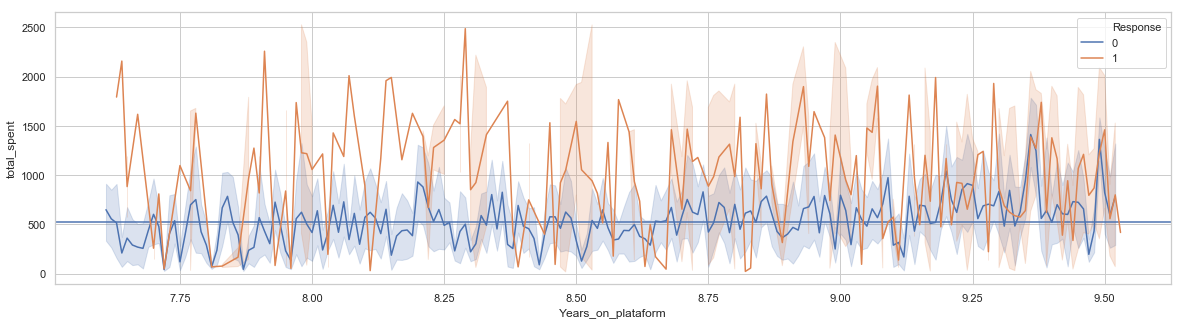

In [283]:
df_inicial['total_spent'] = df_inicial['MntWines'] + df_inicial['MntFruits'] + df_inicial['MntMeatProducts'] + df_inicial['MntFishProducts'] + df_inicial['MntSweetProducts'] + df_inicial['MntGoldProds']  

sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("notebook")                                                  
plt.figure(figsize=(20, 5))    
plt.axhline(stats.trim_mean(df_inicial['total_spent'], 0.1))

sns.lineplot(data=df_inicial[df_inicial['Income'] < 200000], 
    x="Years_on_plataform", y='total_spent' 
             , hue = 'Response');

Acima podemos ver que a progressão de tempo de plataforma não afeta a feature Income e nem total_spent, entretanto quando fazemos a distinção das pessoas que adquiriram o gadget podemos perceber que estas pessoas possuem uma renda anual e o gasto na plataforma maior do que a média da amostra.

### 01.8 - Recency
numero de dias desde a ultima compra.

In [284]:
df_inicial['Recency'].describe()

count    2240.000000
mean       49.109375
std        28.962453
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

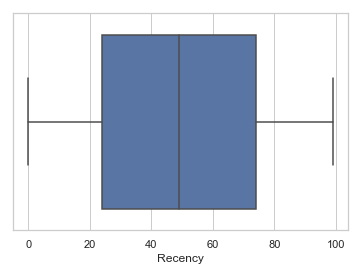

In [285]:
ax = sns.boxplot(x = df_inicial['Recency'])

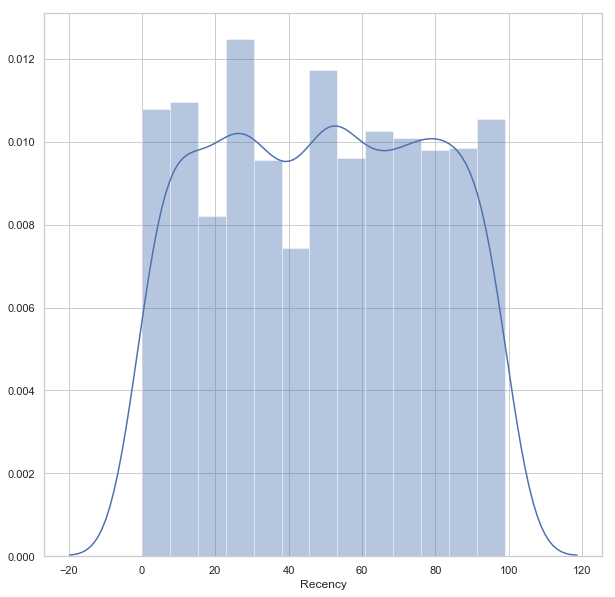

In [286]:
# Seaborn setting                                                                                                                                              
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("notebook")                                                  
plt.figure(figsize=(10, 10)) # Two column paper. Each column is about 3.15 inch wide.                                                                                                                                                                                         
color = sns.color_palette("Set2", 6)


ax = sns.distplot(df_inicial['Recency'])

## Resumo do Grupo de Controle

O grupo de 2240 anotações é formado de grupos homogeneos. Usuários com a imensa maioria com nível minimo de educação universitária, com pessoas entre 30 e 70 anos sendo a maioria da amostra entre 40 e 60 anos que já são clientes a pelo menos 7 anos da companhia.<p>
O grupo de controle possui uma distribuição de 0 a 100 dias desde sua ultima compra, tendo uma distribuição normal em volta da média de 52.000 no valor dos rendimentos anuais. A maior distribuição gasto na compania nos ultimos dois anos esta entre 0 e 200 reais, apresentando uma segunda tendencia entre 300 e 600 reais.

# 02 - Perfil dos Produtos

In [287]:
df_products = pd.concat((df_inicial.iloc[:,9:15], df_income['Total_spent']), axis = 1)
df_products.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_spent
0,635,88,546,172,88,88,808.5
1,11,1,6,2,1,6,13.5
2,426,49,127,111,21,42,388.0
3,11,4,20,10,3,5,26.5
4,173,43,118,46,27,15,211.0


In [288]:
total_amount_products = df_products.sum()
total_amount_products

MntWines            680816.0
MntFruits            58917.0
MntMeatProducts     373968.0
MntFishProducts      84057.0
MntSweetProducts     60621.0
MntGoldProds         98609.0
Total_spent         678494.0
dtype: float64

In [289]:
total_purchases_products = (df_products != 0).sum()
total_purchases_products

MntWines            2227
MntFruits           1840
MntMeatProducts     2239
MntFishProducts     1856
MntSweetProducts    1821
MntGoldProds        2179
Total_spent         2240
dtype: int64

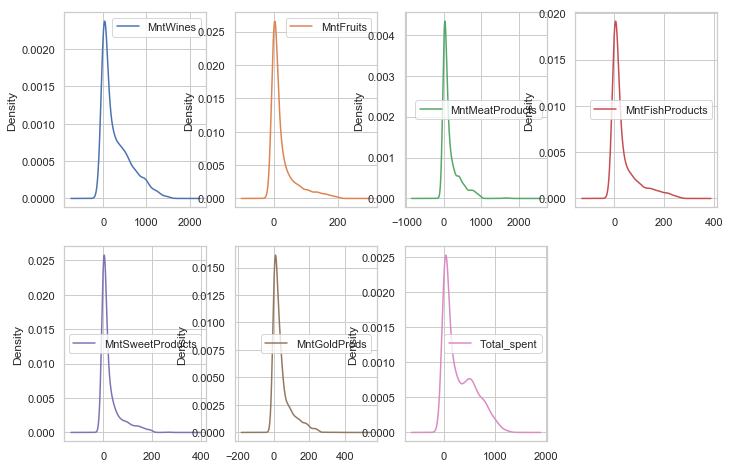

In [290]:
# Density Plots
df_products.plot(kind = 'density',layout = (4,4), subplots = True,  sharex = False, figsize = (11.7, 16.5))
plt.show()

In [291]:
df_produdcts_reshape = pd.DataFrame((total_purchases_products, total_amount_products)).T
df_produdcts_reshape = df_produdcts_reshape.drop('Total_spent', axis = 0)


df_produdcts_reshape = df_produdcts_reshape.rename(columns = {0 : 'Tickets', 1 : 'Total_spent_2y'})

df_produdcts_reshape['Total_spent_1y'] = df_produdcts_reshape['Total_spent_2y'] / 2
df_produdcts_reshape['Ticket_mean'] = (df_produdcts_reshape['Total_spent_2y'] / df_produdcts_reshape['Tickets']).round(2)
df_produdcts_reshape['Market_share'] = (df_produdcts_reshape['Total_spent_1y'] / df_produdcts_reshape['Total_spent_1y'].sum()) * 100

df_produdcts_reshape.sort_values('Total_spent_2y', ascending = False).round(2)

,Tickets,Total_spent_2y,Total_spent_1y,Ticket_mean,Market_share
MntWines,2227.0,680816.0,340408.0,305.71,50.17
MntMeatProducts,2239.0,373968.0,186984.0,167.02,27.56
MntGoldProds,2179.0,98609.0,49304.5,45.25,7.27
MntFishProducts,1856.0,84057.0,42028.5,45.29,6.19
MntSweetProducts,1821.0,60621.0,30310.5,33.29,4.47
MntFruits,1840.0,58917.0,29458.5,32.02,4.34


#### Qual o perfil de gastos de quem gastou entre 300 e 600 com a compania nos ultimos 2 anos?

In [292]:
df_products_1 = pd.concat((df_inicial.iloc[:,9:15], df_income['Total_spent']), axis = 1)
df_products_1 = df_products_1[df_products_1['Total_spent'].between(300, 601)]

In [293]:
total_amount_products_1 = df_products_1.sum()
total_purchases_products_1 = (df_products_1 != 0).sum()

In [294]:
df_produdcts_reshape_1 = pd.DataFrame((total_purchases_products_1, total_amount_products_1)).T
df_produdcts_reshape_1 = df_produdcts_reshape_1.drop('Total_spent', axis = 0)


df_produdcts_reshape_1 = df_produdcts_reshape_1.rename(columns = {0 : 'Tickets', 1 : 'Total_spent_2y'})

df_produdcts_reshape_1['Total_spent_1y'] = df_produdcts_reshape_1['Total_spent_2y'] / 2
df_produdcts_reshape_1['Ticket_mean'] = (df_produdcts_reshape_1['Total_spent_2y'] / df_produdcts_reshape_1['Tickets']).round(2)
df_produdcts_reshape_1['Ticket_rate'] = df_produdcts_reshape_1['Tickets'] / df_produdcts_reshape['Tickets']
#df_produdcts_reshape_1['Market_rate'] = (df_produdcts_reshape_1['Total_spent_1y'] / df_produdcts_reshape['Total_spent_1y'].sum()) * 100

df_produdcts_reshape_1.sort_values('Total_spent_2y', ascending = False).round(2)

,Tickets,Total_spent_2y,Total_spent_1y,Ticket_mean,Ticket_rate
MntWines,505.0,234957.0,117478.5,465.26,0.23
MntMeatProducts,505.0,115603.0,57801.5,228.92,0.23
MntGoldProds,499.0,36099.0,18049.5,72.34,0.23
MntFishProducts,447.0,30928.0,15464.0,69.19,0.24
MntSweetProducts,440.0,22979.0,11489.5,52.22,0.24
MntFruits,445.0,22560.0,11280.0,50.70,0.24


Metade do Income das vendas são provenientes do Vinho, representando **50%** do valor arrecadados pela compania.O vinho também é o produto com a maior valor médio por compra: **305,71**. <p>
Na 2° posição esta produtos provenientes da carne, com 27,5% de representativide do market share, com um valor medio por compra de 167,02.

Quando analisamos os produtos a partir da perspectiva do grupo que teve um gasto entre 300 e 600 pode-se afirmar que é responsável entre 23% e 24% do número de vendas feitas.<p>
O valor médio do gasto com vinhos deste grupo é de **465,26** e com produtos provenientes da carne de **228,92**

# 03 - Perfil dos Meios de Venda

### 03.1 - NumDealsPurchases
numero de compras com desconto

In [295]:
df_inicial['NumDealsPurchases'].describe()

count    2240.000000
mean        2.325000
std         1.932238
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: NumDealsPurchases, dtype: float64

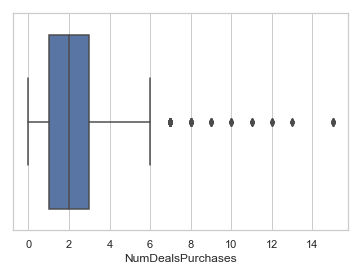

In [296]:
ax = sns.boxplot(x = df_inicial['NumDealsPurchases'])

C:\Users\Alexandre\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


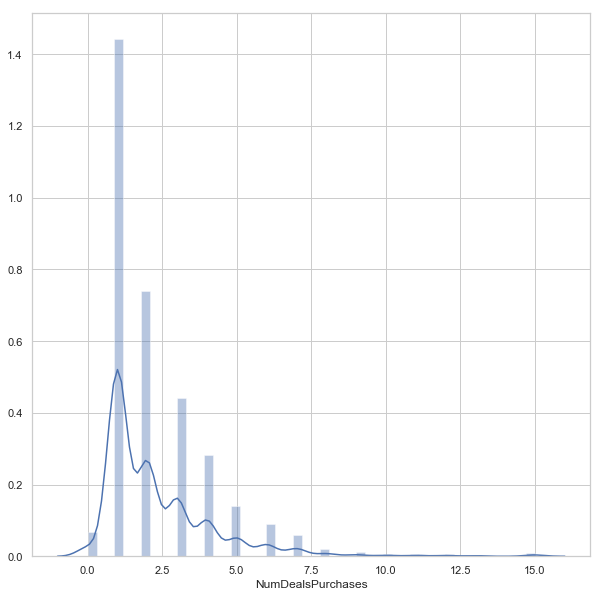

In [297]:
# Seaborn setting                                                                                                                                              
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("notebook")                                                  
plt.figure(figsize=(10, 10)) # Two column paper. Each column is about 3.15 inch wide.                                                                                                                                                                                         
color = sns.color_palette("Set2", 6)


ax = sns.distplot(df_inicial['NumDealsPurchases'])

### 03.2.1 - NumWebPurchases
numero de compras feitas pela internet.

In [298]:
df_inicial['NumWebPurchases'].describe()

count    2240.000000
mean        4.084821
std         2.778714
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        27.000000
Name: NumWebPurchases, dtype: float64

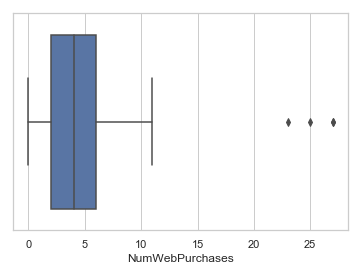

In [299]:
ax = sns.boxplot(x = df_inicial['NumWebPurchases'])

### 03.2.1 - NumWebVisitsMonth
numero de visitas ao site durante o ultimo mes.

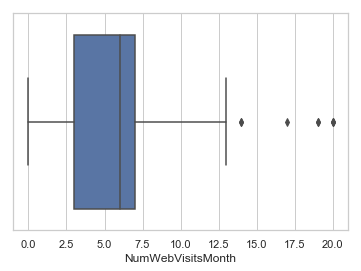

In [300]:
ax = sns.boxplot(x = df_inicial['NumWebVisitsMonth'])

### 03.3 - NumCatalogPurchases
numero de compras feitas pelo catalogo.

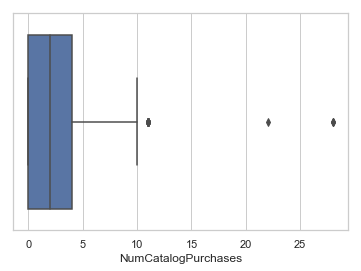

In [301]:
ax = sns.boxplot(x = df_inicial['NumCatalogPurchases'])

### 03.4 - NumStorePurchases
numero de compras feitas na loja.

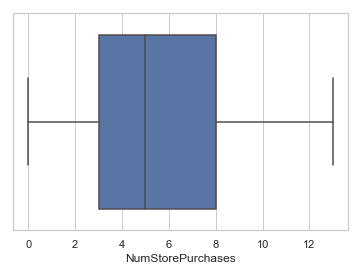

In [302]:
ax = sns.boxplot(x = df_inicial['NumStorePurchases'])

In [303]:
df_plataform = df_inicial.iloc[:,16:19].sum()
df_plataform = pd.DataFrame(df_plataform, columns = ['Purchases'])
df_plataform['rate'] = df_plataform['Purchases'] / df_plataform['Purchases'].sum()

df_plataform.round(2)

,Purchases,rate
NumWebPurchases,9150,0.33
NumCatalogPurchases,5963,0.21
NumStorePurchases,12970,0.46


### A plataforma de venda com maior numero de conversões é a loja fisíca: **46%** de todas as vendas, com uma média de 5 compras por usuário.

In [304]:
df_inicial['Z_CostContact'].describe()

count    2240.0
mean        3.0
std         0.0
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: Z_CostContact, dtype: float64

In [305]:
df_inicial['Z_CostContact'].nunique()

1

In [306]:
df_inicial['Z_Revenue'].nunique()

1

# 04 - Analise das Campanhas

In [307]:
campagnes = pd.concat((df_inicial.iloc[:,20:26], df_inicial['Response'],df_inicial['NumDealsPurchases'] ), axis = 1)
campagnes.head()

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,NumDealsPurchases
0,0,0,0,0,0,0,1,3
1,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,5


In [308]:
campagnes_list = list(campagnes.columns)
campagnes_hist = []

for n in campagnes_list:
    x = (len(df_inicial[df_inicial[n] != 0]))
    campagnes_hist.append(x)

campagnes_hist = pd.DataFrame(campagnes_hist, index = campagnes_list, columns = ['Obs'])

campagnes_hist['rate'] = ((campagnes_hist['Obs'] / len(df_inicial)) * 100).round(2)

campagnes_hist.sort_values(by = 'rate')

,Obs,rate
Complain,21,0.94
AcceptedCmp2,30,1.34
AcceptedCmp1,144,6.43
AcceptedCmp3,163,7.28
AcceptedCmp5,163,7.28
AcceptedCmp4,167,7.46
Response,334,14.91
NumDealsPurchases,2194,97.95


# Criação do Perfil de Consumidor de Vinho Premium - Loja

Na analise exploratória anterior dos dados foi constatadoque o produto que mais gera Income para a companhia é o **vinho**, representando 50% do valor vendido nos últimos dois anos. <p>
Iremos aumentar a granularidade do consumidor de vinhos que gastaram entre 300 e 600 nos últimos dois anos, a preferencia é para o direcionamento para aquisição via loja.

In [309]:
df_wine_01 = df_inicial[df_inicial['total_spent'].between(300, 601)]
#df_wine_01['Marital_Status'] = df_wine_01['Marital_Status'].replace(marital_map)

agreggations = {'ID' : 'count',
                'total_spent' : 'sum',
                'MntWines' : 'sum',
                'Years_on_plataform' : 'mean',
                'Income' : 'mean',
                'NumDealsPurchases' : 'mean',
                'NumWebPurchases' : 'mean',
                'NumCatalogPurchases' : 'mean',
                'NumStorePurchases' : 'mean',
                'NumWebVisitsMonth' : 'mean',
                'Complain' : 'sum',
                'Recency' : 'mean'}

df_wine_01 = df_wine_01.groupby(['Age_cluster', 'Marital_Status']).agg(agreggations)

df_wine_01.sort_values(by = 'total_spent' , ascending = False).reset_index().round(2)

,Age_cluster,Marital_Status,ID,total_spent,MntWines,Years_on_plataform,Income,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Recency
0,40-50,0,65,28882,16141,8.67,51300.71,3.75,5.58,2.06,6.38,5.78,0,49.17
1,50-60,0,49,21489,12825,8.66,51010.13,3.39,6.20,2.29,5.69,5.94,0,48.61
2,60-70,0,40,17720,10320,8.55,54440.33,3.02,5.40,2.17,6.45,5.30,1,45.45
3,60-70,1,31,13535,7557,8.71,51672.23,3.84,5.55,2.35,6.29,5.87,0,36.10
4,50-60,1,28,12935,7182,8.63,51512.96,3.57,5.96,2.14,6.82,5.54,0,41.57
5,40-50,1,26,10880,5255,8.76,51710.96,3.54,5.38,1.73,6.15,6.27,1,49.15
6,70-+,0,23,10053,5812,8.63,50661.57,3.30,5.30,2.35,6.35,5.70,1,57.04
7,0-40,0,19,7980,2336,8.80,44761.84,2.74,5.16,2.21,5.47,6.21,0,51.58
8,0-40,1,8,2973,1151,8.70,43353.75,2.38,4.62,1.75,5.00,7.50,0,40.50
9,70-+,1,4,1880,1536,8.52,50845.00,3.25,7.50,1.50,6.00,7.25,0,31.00


# Criação do Modelo de Clusterização - KNN

In [310]:
df_modelo = df_inicial
#df_modelo = df_modelo.drop('ID', axis = 1)

## 01 - Pré Processamento

### 01.1 - Dados Qualitativos

In [311]:
df_modelo.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 2 columns):
Education      2240 non-null object
Age_cluster    2240 non-null object
dtypes: object(2)
memory usage: 35.1+ KB


In [312]:
# Conforme descrito no EDA, esta feature esta balanceada e basicamente descreve dois grandes grupos de dados: pessoas que estão com alguém(0)e pessoas que não estão com alguém(1).

education_map = {'Graduation' : 2,
               'PhD' : 3,
               'Master' : 4,
               '2n Cycle' : 1,
               'Basic' : 0}

df_modelo = df_modelo.replace(education_map)

In [313]:
df_modelo = df_modelo.drop('Age_cluster', axis = 1)

In [314]:
df_modelo.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Empty DataFrame

### 01.2 - Dados Quantitativos

In [315]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 32 columns):
ID                     2240 non-null int64
Year_Birth             2240 non-null int64
Education              2240 non-null int64
Marital_Status         2240 non-null int64
Income                 2240 non-null float64
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Dt_Customer            2240 non-null datetime64[ns]
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCmp3          

In [316]:
# Deletando as features que representam uma mesma informação, criadas durante a fase de EDA

features_drop = ['Year_Birth', 'Dt_Customer', 'Z_CostContact','Z_Revenue', 'total_spent']
df_modelo = df_modelo.drop(features_drop, axis = 1)

In [317]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
ID                     2240 non-null int64
Education              2240 non-null int64
Marital_Status         2240 non-null int64
Income                 2240 non-null float64
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCmp3           2240 non-null int64
AcceptedCmp4           2240 non-null int64
AcceptedCmp5           2240 non

In [318]:
continuous = ['Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases',
             'NumWebVisitsMonth','Complain','Age','Years_on_plataform']

df_continuous = df_modelo.loc[:,continuous]

In [319]:
df_continuous.skew()

Income                  0.348867
Recency                -0.001987
MntWines                1.175771
MntFruits               2.102063
MntMeatProducts         2.083233
MntFishProducts         1.919769
MntSweetProducts        2.136081
MntGoldProds            1.886106
NumDealsPurchases       2.418569
NumWebPurchases         1.382794
NumCatalogPurchases     1.880989
NumStorePurchases       0.702237
NumWebVisitsMonth       0.207926
Complain               10.188972
Age                     0.349944
Years_on_plataform     -0.015130
dtype: float64

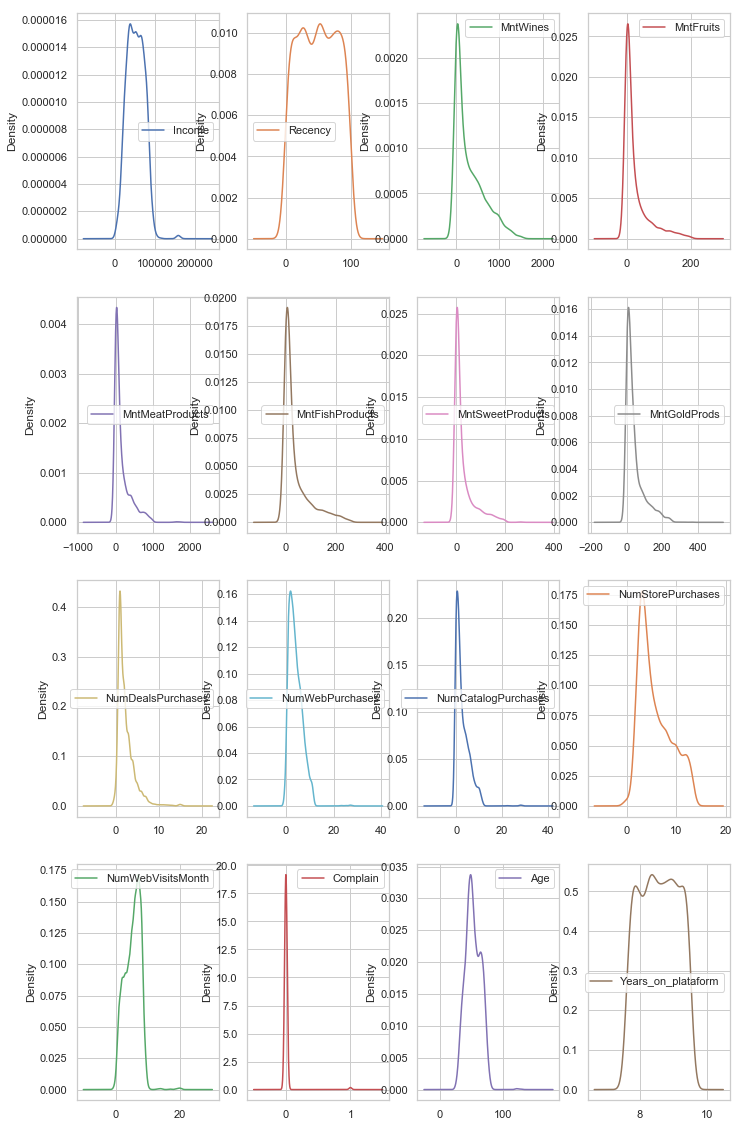

In [320]:
# Density Plots
df_continuous.plot(kind = 'density',layout = (4,4), subplots = True,  sharex = False, figsize = (11.7, 20));

In [321]:
from sklearn.preprocessing import StandardScaler

# Gerando os dados padronizados
standard = StandardScaler().fit_transform(df_continuous)

In [322]:
from sklearn.preprocessing import Normalizer

# Gerando os dados normalizados
scaler = Normalizer().fit_transform(standard)

In [323]:
# Criando um novo dataset normalizado
indice_colunas = list(df_continuous.columns[:])

df_continuous_norm = pd.DataFrame(scaler, columns = indice_colunas)

df_continuous_norm.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Years_on_plataform
0,0.054569,0.058162,0.186355,0.293912,0.318182,0.466399,0.279690,0.159727,0.066189,0.266961,0.475632,-0.104334,0.131445,-0.018428,0.186652,0.291210
1,-0.086930,-0.126802,-0.287696,-0.210299,-0.235723,-0.214975,-0.208714,-0.240938,-0.055603,-0.366993,-0.187963,-0.385408,-0.043119,-0.032152,0.408413,-0.393241
2,0.315944,-0.274760,0.124876,0.196512,-0.060947,0.463142,-0.050575,-0.013346,-0.236132,0.485185,-0.077992,0.445915,-0.186819,-0.033491,0.109356,-0.073866
3,-0.389326,-0.262552,-0.286367,-0.184509,-0.214225,-0.165796,-0.191808,-0.246133,-0.055346,-0.246881,-0.299664,-0.181195,0.092679,-0.032003,-0.417191,-0.349834
4,0.109927,0.577082,-0.144832,0.156308,-0.080744,0.057758,-0.000568,-0.207130,0.515443,0.122625,0.043045,0.024030,-0.048563,-0.036212,-0.378849,-0.355501


In [324]:
df_continuous_norm.skew()

Income                 -0.169017
Recency                -0.004290
MntWines                0.852213
MntFruits               1.445668
MntMeatProducts         1.234672
MntFishProducts         1.339015
MntSweetProducts        1.463585
MntGoldProds            1.233208
NumDealsPurchases       1.376793
NumWebPurchases         0.521060
NumCatalogPurchases     0.744419
NumStorePurchases       0.565060
NumWebVisitsMonth      -0.145500
Complain               10.085151
Age                     0.176797
Years_on_plataform     -0.058983
dtype: float64

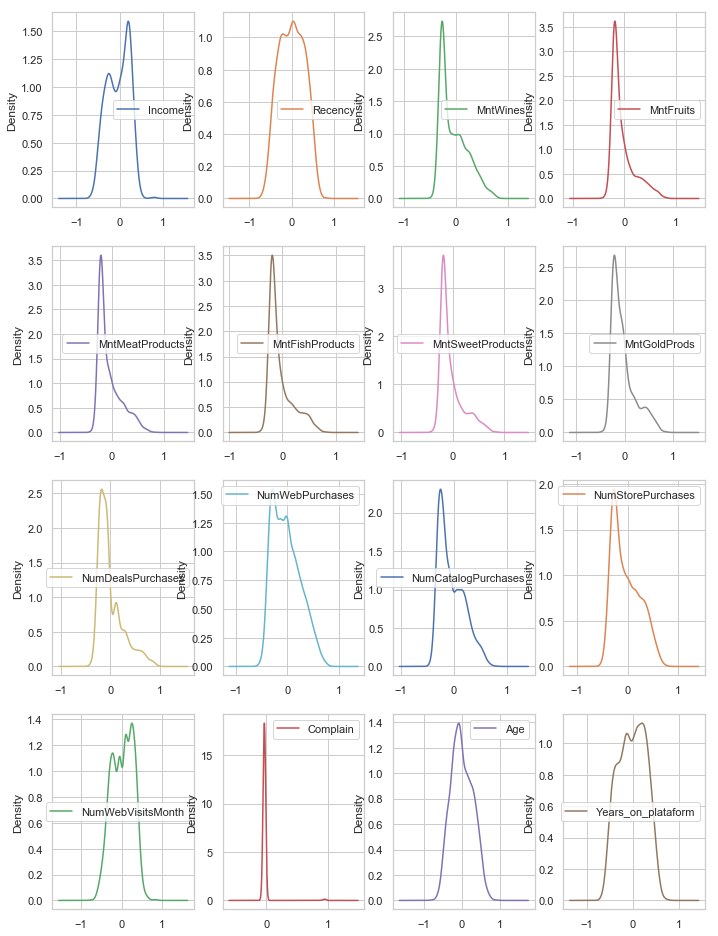

In [325]:
# Density Plots
df_continuous_norm.plot(kind = 'density',layout = (4,4), subplots = True,  sharex = False, figsize = (11.7, 16.5));

In [326]:
for  i in continuous:
    df_modelo[i] = df_continuous_norm[i]

df_modelo.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Years_on_plataform
0,5524,2,1,0.054569,0,0,0.058162,0.186355,0.293912,0.318182,...,0.131445,0,0,0,0,0,-0.018428,1,0.186652,0.291210
1,2174,2,1,-0.086930,1,1,-0.126802,-0.287696,-0.210299,-0.235723,...,-0.043119,0,0,0,0,0,-0.032152,0,0.408413,-0.393241
2,4141,2,0,0.315944,0,0,-0.274760,0.124876,0.196512,-0.060947,...,-0.186819,0,0,0,0,0,-0.033491,0,0.109356,-0.073866
3,6182,2,0,-0.389326,1,0,-0.262552,-0.286367,-0.184509,-0.214225,...,0.092679,0,0,0,0,0,-0.032003,0,-0.417191,-0.349834
4,5324,3,0,0.109927,1,0,0.577082,-0.144832,0.156308,-0.080744,...,-0.048563,0,0,0,0,0,-0.036212,0,-0.378849,-0.355501


# KNN

In [327]:
# Imports
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pylab as pl

#### Segmentação - Encontrando o Valor Ideal de Clusters

Vamos testar diferentes valores de K (valores de cluster) entre 2 e 10.

Para a inicialização dos clusters, usamos o algoritmo k-means++ que oferece convergência mais rápida para o resultado final.

In [328]:
x = df_modelo.drop('Response', axis =1).values
y = df_modelo.loc[:,'Response'].values

labels =df_modelo.drop('Response', axis =1).columns

In [329]:
# Lista do WCSS
wcss_X1 = []

In [330]:
# Loop para testar os valores de K
for n in range(2, 11):
    modelo = (KMeans(n_clusters = n,
                     init = 'k-means++', 
                     n_init = 10,
                     max_iter = 300, 
                     tol = 0.0001,  
                     random_state = 111, 
                     algorithm = 'elkan'))
    modelo.fit(x)
    wcss_X1.append(modelo.inertia_)

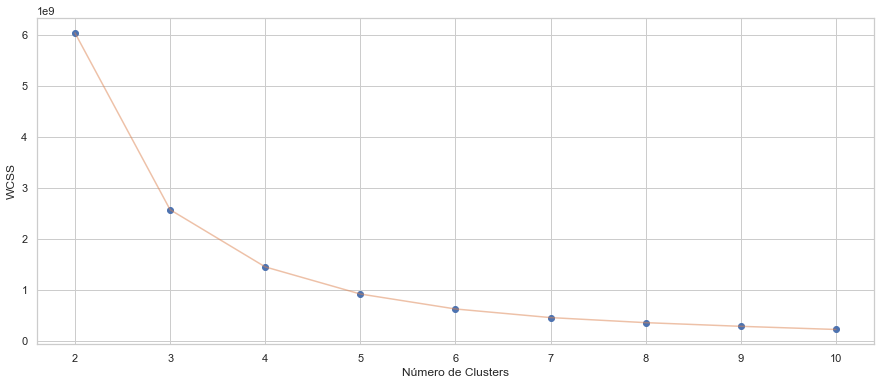

In [331]:
# Plot
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , wcss_X1 , 'o')
plt.plot(np.arange(2 , 11) , wcss_X1 , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('WCSS')
plt.show()

In [332]:
kmeans.labels_

NameError: name 'kmeans' is not defined

In [ ]:
modelo = (KMeans(n_clusters = 4,
                     init = 'random', 
                     n_init = 10,
                     max_iter = 300, 
                     tol = 0.0001,  
                     random_state = 111, 
                     algorithm = 'elkan'))
modelo.fit(x)
wcss_X1.append(modelo.inertia_)

In [ ]:
# Criando o Cluster Map
cluster_map = pd.DataFrame(df_modelo)
cluster_map['cluster'] = kmeans.labels_
cluster_map["ID"] = cluster_map.index + 1

In [ ]:
pca = PCA(n_components = 2).fit(df_modelo)
# Aplicando o PCA
pca_2d = pca.transform(df_modelo)

In [ ]:
pca_2d.shape

In [ ]:
# Gerando "labels" para os resultados dos clusters
for i in range(0, pca_2d.shape[0]):
    
    if kmeans.labels_[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1], c ='r', marker = '+')
        
    elif kmeans.labels_[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1], c ='g', marker = 'o')

    elif kmeans.labels_[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1], c ='b', marker = '*')
        
    elif kmeans.labels_[i] == 3:
        c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1], c ='b', marker = '*')
        
    elif kmeans.labels_[i] == 4:
        c5 = pl.scatter(pca_2d[i,0],pca_2d[i,1], c ='b', marker = '*')
        
        pl.legend([c1, c2, c3, c4, c5],['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
        pl.title('Clusters K-means em 4 clusters')
pl.show()

In [ ]:
cluster_map['cluster'].nunique()

In [ ]:
cluster_map.groupby('cluster').size()

In [ ]:
df_wine = pd.concat((df_inicial, cluster_map.loc[:,'cluster']), axis = 1)
df_wine['Marital_Status'] = df_wine['Marital_Status'].replace(marital_map)

agreggations = {'ID' : 'count',
                'Age' : 'mean',
                'Years_on_plataform' : 'mean',
                'Income' : 'mean',
                'MntWines' : 'sum', 
                'NumDealsPurchases' : 'mean',
                'NumWebPurchases' : 'mean',
                'NumCatalogPurchases' : 'mean',
                'NumStorePurchases' : 'mean',
                'NumWebVisitsMonth' : 'mean',
                'Complain' : 'sum',
                'Recency' : 'mean'}

df_wine = df_wine.groupby(['cluster','Age_cluster','Marital_Status', 'Education']).agg(agreggations).sort_values(by = 'MntWines', ascending = False).reset_index()

df_wine['wine_repr'] = ((df_wine['MntWines'] / df_wine['MntWines'].sum()).round(2))
df_wine['wine_repr_cum'] = ((df_wine['MntWines'] / df_wine['MntWines'].sum()).round(2)).cumsum()
df_wine['renda_vinho'] =  df_wine['MntWines'] / (df_wine['Income'] / 2)

df_wine['popu_rate'] = ((df_wine['ID'] / df_wine['ID'].sum()).round(2))
df_wine['popu_rate'] = ((df_wine['popu_rate'] / df_wine['popu_rate'].sum()).round(2)).cumsum()

(df_wine.head(11)).round(2)

In [ ]:
df_wine = pd.concat((df_inicial, cluster_map.loc[:,'cluster']), axis = 1)
df_wine['Marital_Status'] = df_wine['Marital_Status'].replace(marital_map)

agreggations = {'ID' : 'count',
                'Age' : 'mean',
                'Years_on_plataform' : 'mean',
                'Income' : 'mean',
                'MntWines' : 'sum', 
                'MntFruits' : 'sum',
                'MntMeatProducts' : 'sum',
                'MntFishProducts' : 'sum',
                'MntSweetProducts' : 'sum',
                'MntGoldProds' : 'sum',
                'NumDealsPurchases' : 'mean',
                'NumWebPurchases' : 'mean',
                'NumCatalogPurchases' : 'mean',
                'NumStorePurchases' : 'mean',
                'NumWebVisitsMonth' : 'mean',
                'Complain' : 'sum',
                'Recency' : 'mean'}

df_wine = df_wine.groupby(['cluster']).agg(agreggations).sort_values(by = 'MntWines', ascending = False).reset_index()


df_wine['popu_rate'] = ((df_wine['ID'] / df_wine['ID'].sum()).round(2))
df_wine['popu_rate'] = ((df_wine['popu_rate'] / df_wine['popu_rate'].sum()).round(2)).cumsum()

(df_wine.head(11)).round(2)

In [ ]:
df_wine = pd.concat((df_inicial, cluster_map.loc[:,'cluster']), axis = 1)
df_wine['Marital_Status'] = df_wine['Marital_Status'].replace(marital_map)

agreggations = {'ID' : 'count',
                'Age' : 'mean',
                'Years_on_plataform' : 'mean',
                'Income' : 'mean',
                'AcceptedCmp1' : 'sum', 
                'AcceptedCmp2' : 'sum',
                'AcceptedCmp3' : 'sum',
                'AcceptedCmp4' : 'sum',
                'AcceptedCmp5' : 'sum',
                'Response' : 'sum',
                'NumDealsPurchases' : 'mean',
                'NumWebPurchases' : 'mean',
                'NumCatalogPurchases' : 'mean',
                'NumStorePurchases' : 'mean',
                'NumWebVisitsMonth' : 'mean',
                'Complain' : 'sum',
                'Recency' : 'mean'}

df_wine = df_wine.groupby(['cluster']).agg(agreggations).reset_index()


df_wine['popu_rate'] = ((df_wine['ID'] / df_wine['ID'].sum()).round(2))
df_wine['popu_rate'] = ((df_wine['popu_rate'] / df_wine['popu_rate'].sum()).round(2)).cumsum()

(df_wine.head(11)).round(2)

# Criação do Modelo - Classificador

In [ ]:
x = df_modelo.drop(['Response', 'ID'], axis =1).values
y = df_modelo.loc[:,'Response'].values

labels =df_modelo.drop(['Response', 'ID'], axis =1).columns

In [ ]:
modelo_v1 = DecisionTreeClassifier(max_depth = 5, 
                                   max_features = 15, 
                                   criterion = 'entropy', 
                                   min_samples_leaf = 2, 
                                   min_samples_split = 2)

In [ ]:
modelo_v1.fit(x, y)

In [ ]:
# Definindo o nome do arquivo com a árvore de decisão
arquivo = 'C:/Users/Alexandre/Documents/Felix/Projetos/Prova_iFood/tree_modelo_v1.dot'

In [ ]:
# Gerando o gráfico da árvore de decisão
export_graphviz(modelo_v1, out_file = arquivo, feature_names = labels)
with open(arquivo) as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## Ensemble 

In [ ]:
# Imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
# Cria o classificador com uma árvore de decisão
clf = DecisionTreeClassifier(max_depth = 10, min_samples_split = 2, random_state = 0)
scores = cross_val_score(clf, x, y)
mean = scores.mean()
print(scores)
print(mean)

In [ ]:
# Cria o classificador com Random Forest
clf = RandomForestClassifier(n_estimators = 10, max_depth = 10, min_samples_split = 2, random_state = 0)
scores = cross_val_score(clf, x, y)
mean = scores.mean()
print(scores)
print(mean)

In [ ]:
# Cria o classificador com Extra Tree
clf = ExtraTreesClassifier(n_estimators = 10, max_depth = 10, min_samples_split = 2, random_state = 0)
scores = cross_val_score(clf, x, y)
mean = scores.mean()
print(scores)
print(mean)

#  Adaboost

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

In [ ]:
# Construindo o estimador base
estim_base = DecisionTreeClassifier(max_depth = 1, min_samples_leaf = 1)

In [ ]:
# Construindo a primeira versão do modelo Adaboost
ada_clf_v1 = AdaBoostClassifier(base_estimator = estim_base, 
                                learning_rate = 1, 
                                n_estimators = 400, 
                                algorithm = "SAMME")

In [ ]:
# Treinamento do modelo
ada_clf_v1.fit(X_train, y_train)

In [ ]:
# Score
scores = cross_val_score(ada_clf_v1, X_test, y_test)
print(scores)
means = scores.mean()
print(means)